In [53]:
#1차 수정
#softmax->sigmoid 수정, 학습률 수정

In [1]:
import numpy as np
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/AI/DL/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df. columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

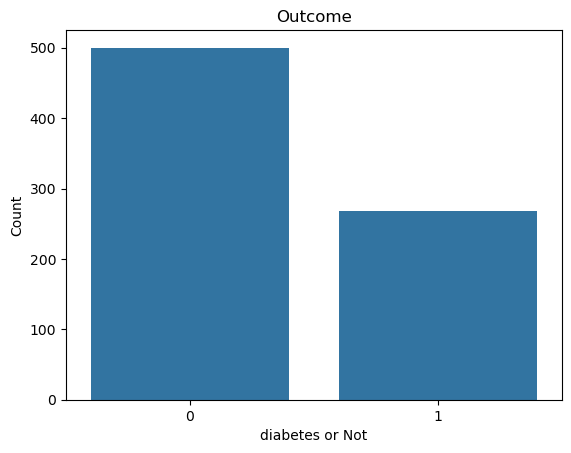

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [6]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_19864\2859217949.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1)
C:\Users\tpfzl\AppData\Local\Temp\ipykernel_19864\2859217949.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPre

<Axes: xlabel='BloodPressure', ylabel='Density'>

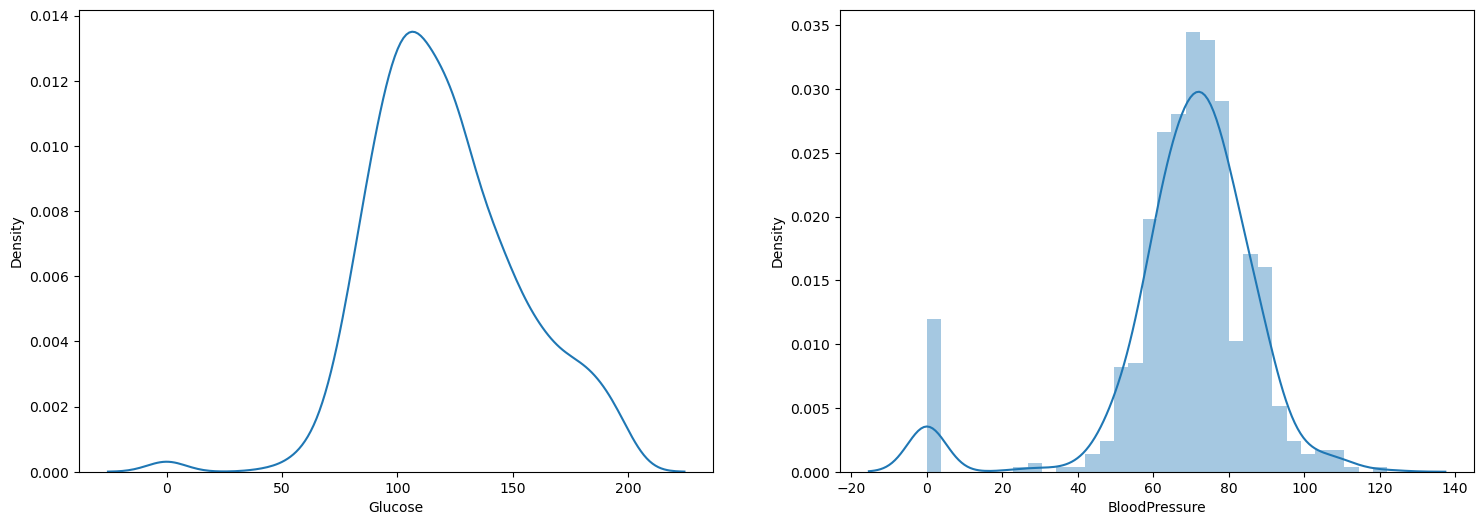

In [9]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['BloodPressure'], ax=ax2)

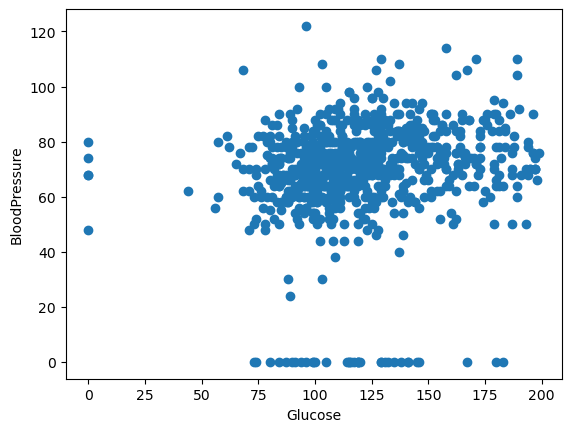

In [10]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.show()

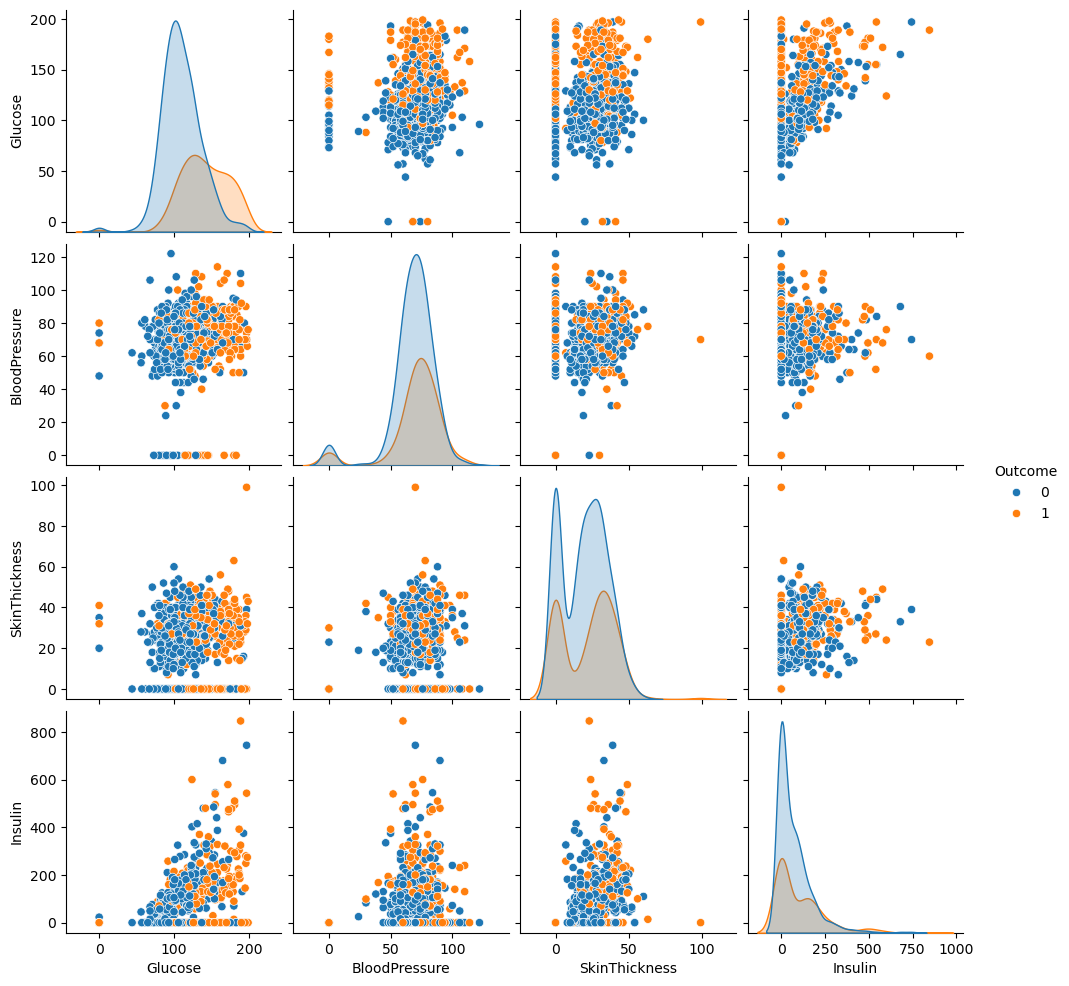

In [11]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'],
            hue ='Outcome')
plt.show()

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_19864\1289762078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Glucose", data=df, palette="Set3")


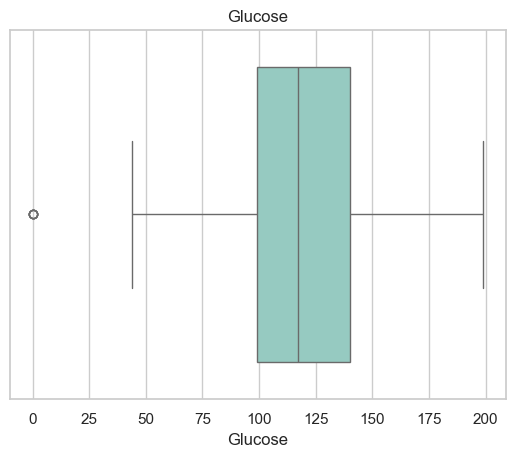

In [12]:

# 특정 칼럼의 범위 확인 및 outlier 확인, boxplot

sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")
plt.title("Glucose")
plt.show()

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_19864\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


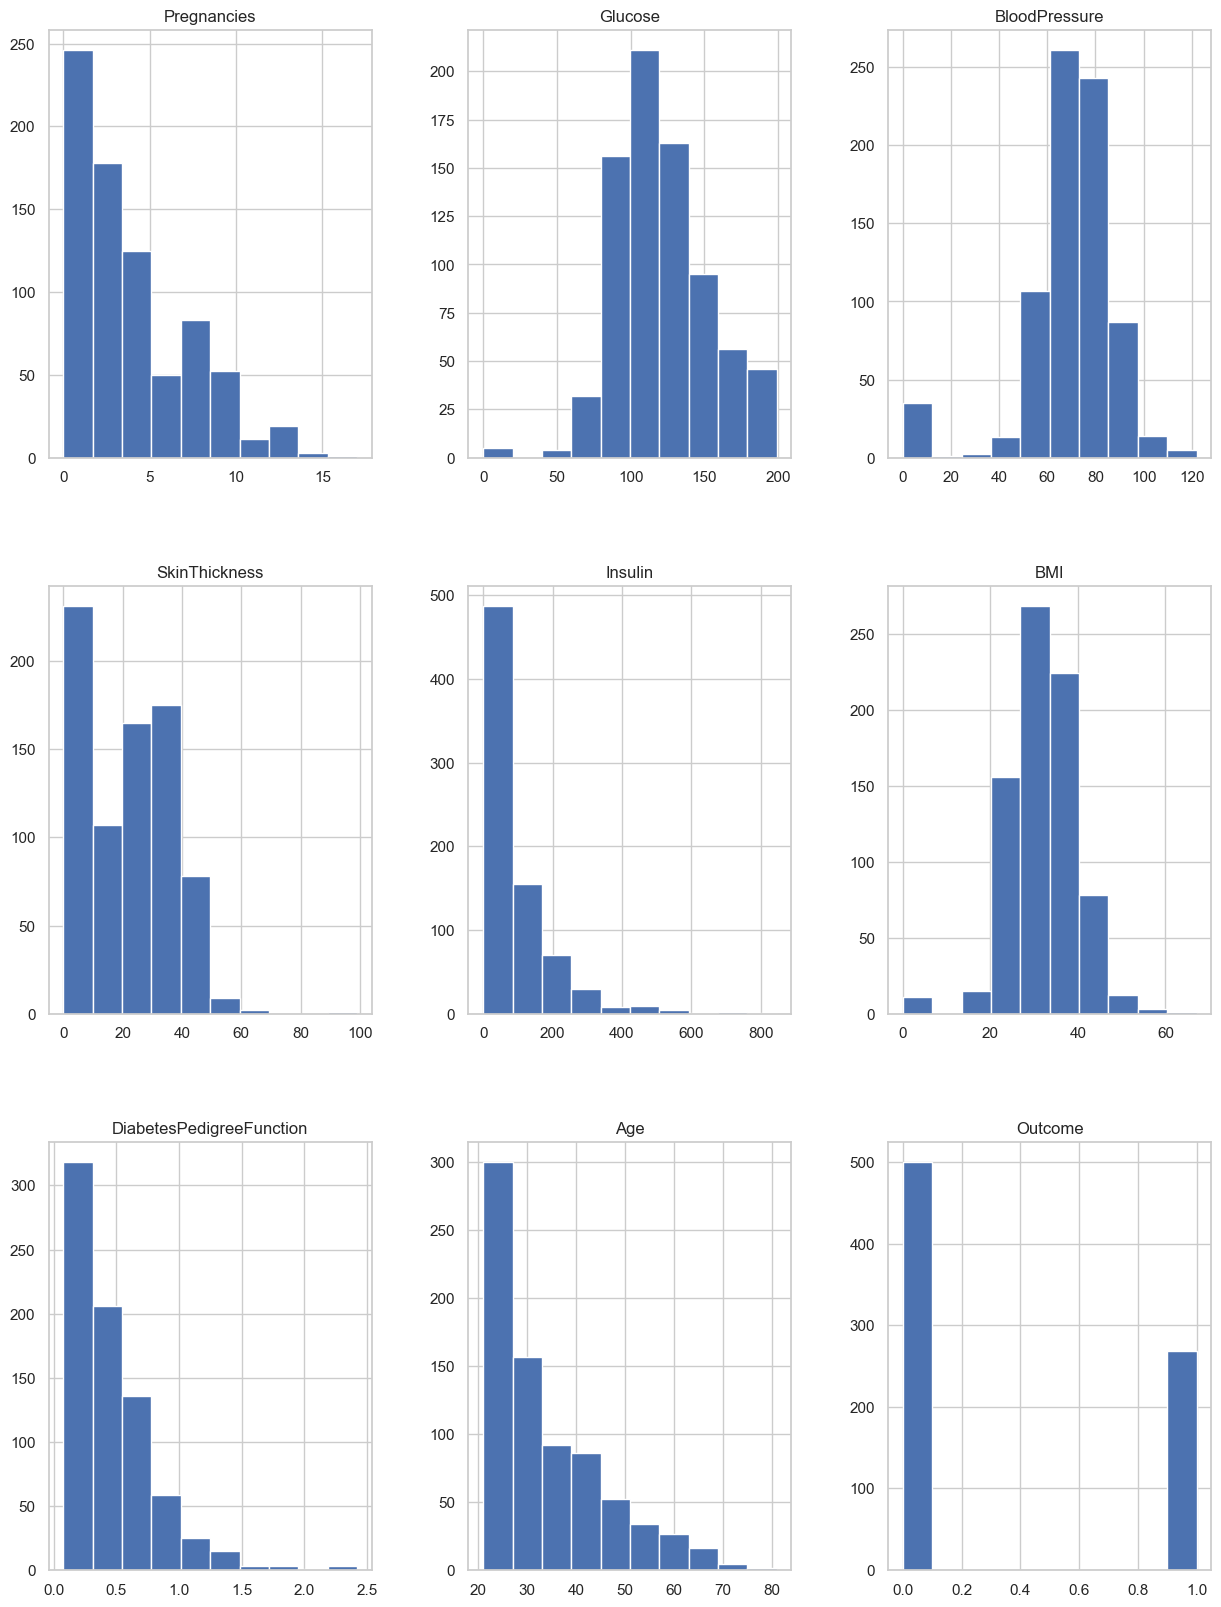

In [13]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [14]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
#원핫 인코딩

Y = pd.get_dummies(y).values

In [17]:
X = X.values

In [18]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 8), (154, 8), (614, 2), (154, 2))

In [21]:
y_train = y_train.astype(int)
y_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [85]:
#모델 구축
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\tpfzl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,634 (6.38 KB)

 Trainable params: 1,634 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=100,validation_split=0.2)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5372 - loss: 7.5503 - val_accuracy: 0.3171 - val_loss: 2.0822
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5325 - loss: 1.5527 - val_accuracy: 0.6341 - val_loss: 1.0072
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6532 - loss: 0.8793 - val_accuracy: 0.6016 - val_loss: 0.6932
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5720 - loss: 0.6975 - val_accuracy: 0.6829 - val_loss: 0.6441
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6691 - loss: 0.6350 - val_accuracy: 0.6504 - val_loss: 0.6344
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6762 - loss: 0.6075 - val_accuracy: 0.7154 - val_loss: 0.6215
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6987 - loss: 0.5822 - val_accuracy: 0.6911 - val_loss: 0.6297
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7062 - loss: 0.5727 - val_accuracy: 0.6585 - val_loss: 0.6385
Epoch 9

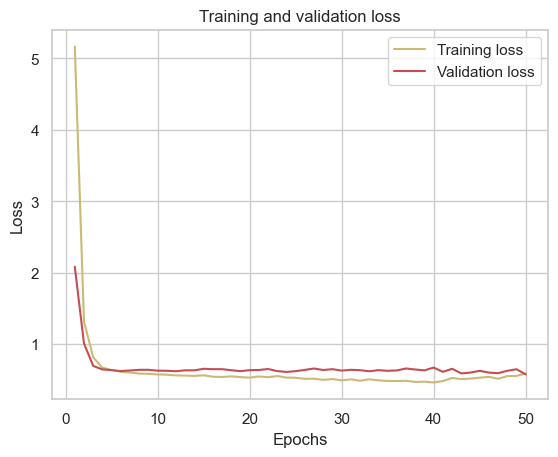

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

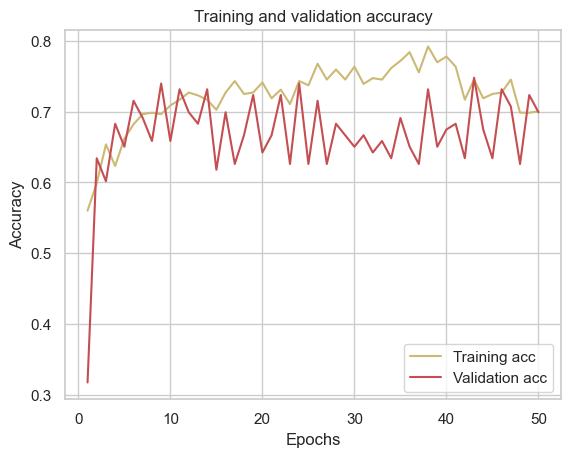

In [89]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       107
           1       0.53      0.60      0.56        47

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.71      0.72       154

[[82 25]
 [19 28]]
